In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
import os

***Read Speech File***

In [0]:
f = open("BO_Speech.txt", "r")
print(f.read())
filedata = f.read()
#Print first 1000 characters in the file
print("Data read from file : ", filedata[0:1000] )

﻿Was trying to explain to somebody as we were flying in, that's corn. That's beans. And they were very impressed at my agricultural knowledge. Please give it up for Amaury once again for that outstanding introduction. I have a bunch of good friends here today, including somebody who I served with, who is one of the finest senators in the country, and we're lucky to have him, your Senator, Dick Durbin is here. I also noticed, by the way, former Governor Edgar here, who I haven't seen in a long time, and somehow he has not aged and I have. And it's great to see you, Governor. I want to thank President Killeen and everybody at the U of I System for making it possible for me to be here today. And I am deeply honored at the Paul Douglas Award that is being given to me. He is somebody who set the path for so much outstanding public service here in Illinois.
 
Now, I want to start by addressing the elephant in the room. I know people are still wondering why I didn't speak at the commencement.

***Creating the Corpus***

In [0]:
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
corpus_root = os.getcwd() + "/"
corpus=PlaintextCorpusReader(os.getcwd(),"BO_Speech.txt")
print(corpus)

<PlaintextCorpusReader in '/content'>


In [0]:
print("Files in this corpus : ", corpus.fileids())

Files in this corpus :  ['BO_Speech.txt']


***Exploring Corpus***

In [0]:
paragraphs=corpus.paras()
print("\n Total paragraphs in this corpus : ", len(paragraphs))


 Total paragraphs in this corpus :  73


In [0]:
sentences=corpus.sents()
print("\n Total sentences in this corpus : ", len(sentences))
print("\n The first sentence : ", sentences[0])


 Total sentences in this corpus :  382

 The first sentence :  ['Was', 'trying', 'to', 'explain', 'to', 'somebody', 'as', 'we', 'were', 'flying', 'in', ',', 'that', "'", 's', 'corn', '.']


***Extracting Words from Corpus***

In [0]:
print("\n Words in this corpus : ",corpus.words() )


 Words in this corpus :  ['Was', 'trying', 'to', 'explain', 'to', 'somebody', ...]


In [0]:
#Frequency distribution of words in the corpus
course_freq_dist=nltk.FreqDist(corpus.words())

#Most commonly used words
print("Top 10 words in the corpus : ", course_freq_dist.most_common(10))

#Distribution for a specific word
print("\n Distribution for \"American\" : ",course_freq_dist.get("American"))

Top 10 words in the corpus :  [(',', 381), ('.', 372), ("'", 258), ('the', 256), ('and', 233), ('to', 228), ('of', 169), ('a', 127), ('that', 122), ('in', 110)]

 Distribution for "American" :  6


In [0]:
f = open("BO_Speech.txt", "r")
filedata = f.read()

***Tokenization***

In [0]:
token_list = nltk.word_tokenize(filedata)
print("Token List : ",token_list[:20])
print("\n Total Tokens : ",len(token_list))

Token List :  ['\ufeffWas', 'trying', 'to', 'explain', 'to', 'somebody', 'as', 'we', 'were', 'flying', 'in', ',', 'that', "'s", 'corn', '.', 'That', "'s", 'beans', '.']

 Total Tokens :  7829


In [0]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

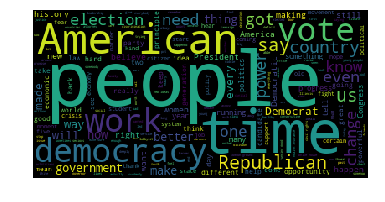

In [0]:
wordcloud = WordCloud().generate(filedata)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [0]:
def wordfreq(tokens):
    word_freq = {}
    for tok in token_list:
        if tok.lower() in word_freq:
            word_freq = tok.lower.append()
        else:
            word_freq = tok.lower()
    return word_freq

<FreqDist with 1778 samples and 7829 outcomes>
[(',', 378), ('.', 369), ('the', 256), ('and', 233), ('to', 228), ('of', 169), ('a', 127), ('that', 122), ('in', 109), ('I', 93), ("'s", 90), ("n't", 86), ('we', 83), ('you', 83), ('it', 75), ('our', 68), ('are', 63), ('And', 61), ('for', 61), ('have', 59), ('not', 59), ('is', 57), ('people', 55), ('or', 53), ('do', 51)]


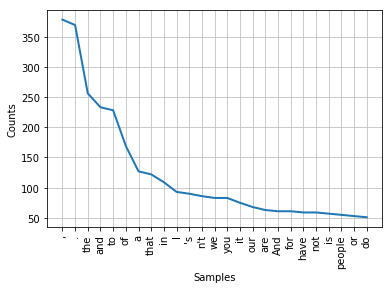

In [0]:
import operator
%matplotlib inline
Freq_dist_nltk=nltk.FreqDist(token_list)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

In [0]:
#Use the Punkt library to remove punctuations
token_list2 = list(filter(lambda token: nltk.tokenize.punkt.PunktToken(token).is_non_punct, token_list))
print("Token List after removing punctuation : ",token_list2[:20])
print("\nTotal tokens after removing punctuation : ", len(token_list2))

Token List after removing punctuation :  ['\ufeffWas', 'trying', 'to', 'explain', 'to', 'somebody', 'as', 'we', 'were', 'flying', 'in', 'that', "'s", 'corn', 'That', "'s", 'beans', 'And', 'they', 'were']

Total tokens after removing punctuation :  7030


<FreqDist with 1767 samples and 7030 outcomes>
[('the', 256), ('and', 233), ('to', 228), ('of', 169), ('a', 127), ('that', 122), ('in', 109), ('I', 93), ("'s", 90), ("n't", 86), ('we', 83), ('you', 83), ('it', 75), ('our', 68), ('are', 63), ('And', 61), ('for', 61), ('have', 59), ('not', 59), ('is', 57), ('people', 55), ('or', 53), ('do', 51), ('on', 49), ('they', 44)]


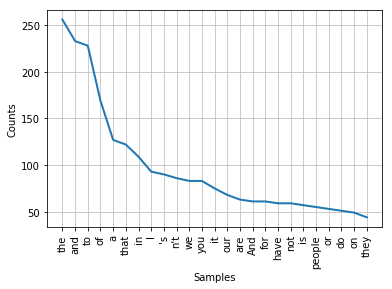

In [0]:
import operator
%matplotlib inline
Freq_dist_nltk=nltk.FreqDist(token_list2)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

***Stopword Removal***

In [0]:
#Download the standard stopword list
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
#Remove stopwords

stop_words = stopwords.words('english')
# token_list3 = list(filter(lambda token: token not in stopwords.words('english'), token_list2))


token_list3 = [word for word in token_list2 if word not in stop_words]

print("Token list after removing stop words : ", token_list3[:20])
print("\nTotal tokens after removing stop words : ", len(token_list3))

Token list after removing stop words :  ['\ufeffWas', 'trying', 'explain', 'somebody', 'flying', "'s", 'corn', 'That', "'s", 'beans', 'And', 'impressed', 'agricultural', 'knowledge', 'Please', 'give', 'Amaury', 'outstanding', 'introduction', 'I']

Total tokens after removing stop words :  3880


<FreqDist with 1656 samples and 3880 outcomes>
[('I', 93), ("'s", 90), ("n't", 86), ('And', 61), ('people', 55), ("'re", 41), ('It', 24), ('like', 24), ('We', 23), ('democracy', 21), ("'ve", 21), ('time', 20), ('us', 18), ('make', 18), ('work', 18), ('even', 18), ('got', 17), ('You', 17), ('That', 16), ('country', 16), ('know', 16), ('But', 16), ('vote', 16), ('get', 16), ('need', 15), ('say', 15), ('change', 15), ('power', 15), ('Americans', 14), ('running', 14), ('The', 13), ('made', 13), ('new', 13), ("'m", 13), ('every', 13), ('things', 13), ('way', 12), ('So', 12), ('government', 12), ('good', 11)]


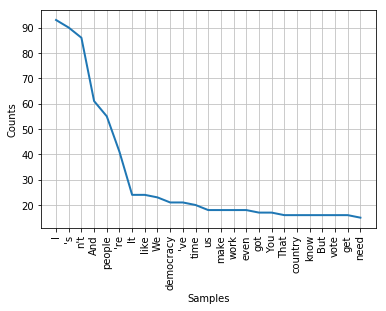

In [0]:
#Frequncy Distribution after stop word removal
Freq_dist_nltk=nltk.FreqDist(token_list3)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:40])
Freq_dist_nltk.plot(25, cumulative=False)

In [0]:
def comment(tokens):
    comment_words = ' '
    for word in tokens:
        comment_words = comment_words + word + ' '
    return comment_words

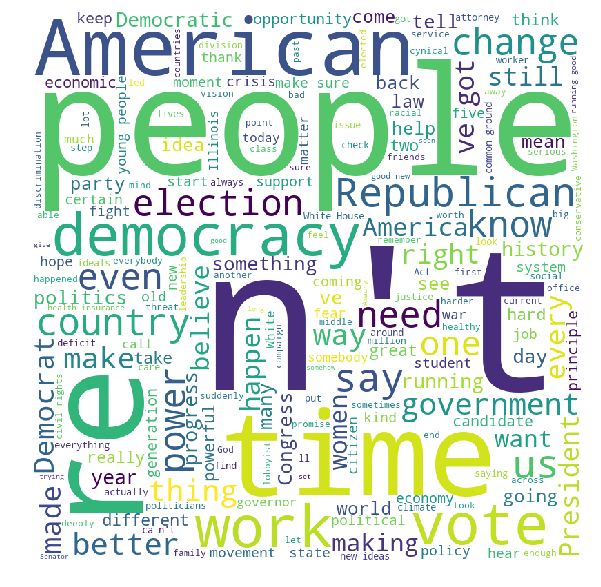

In [0]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
stop_word = comment(token_list3)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(stop_word)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

## ***Stemming***

In [0]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

#Stem data
token_list4 = [stemmer.stem(word) for word in token_list3 ]
print("Token list after stemming : ", token_list4[:20])
print("\nTotal tokens after Stemming : ", len(token_list4))

Token list after stemming :  ['\ufeffwa', 'tri', 'explain', 'somebodi', 'fli', "'s", 'corn', 'that', "'s", 'bean', 'and', 'impress', 'agricultur', 'knowledg', 'pleas', 'give', 'amauri', 'outstand', 'introduct', 'I']

Total tokens after Stemming :  3880


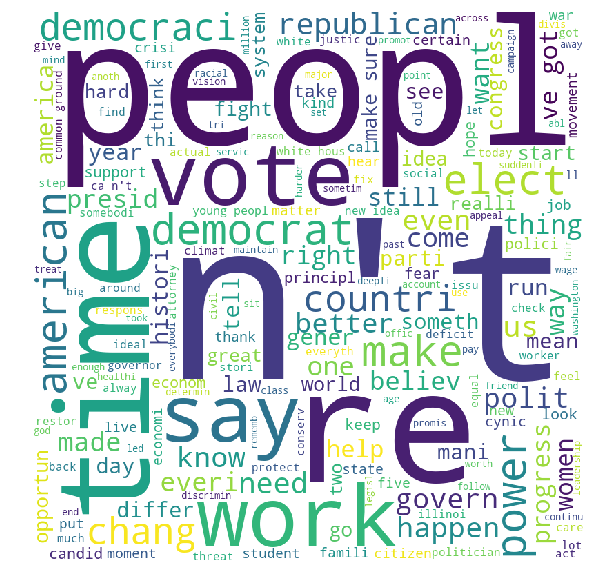

In [0]:
Stemmed_text = comment(token_list4)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(Stemmed_text)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

<FreqDist with 1342 samples and 3880 outcomes>
[('I', 93), ("'s", 90), ("n't", 86), ('and', 61), ('peopl', 57), ("'re", 41), ('make', 30), ('time', 26), ('vote', 26), ('work', 26), ('like', 25), ('It', 24), ('say', 23), ('We', 23), ('democrat', 23), ('power', 22), ('get', 22), ('elect', 21), ('democraci', 21), ("'ve", 21), ('countri', 20), ('american', 20), ('chang', 20), ('even', 19), ('republican', 19)]


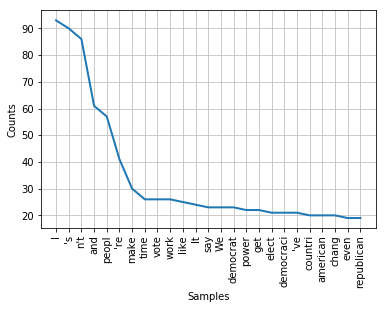

In [0]:
#Frequncy Distribution 
Freq_dist_nltk=nltk.FreqDist(token_list4)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

In [0]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
s = TreebankWordDetokenizer().detokenize(token_list4)

## ***Removing Custom Stop Words***

In [0]:
print(stop_words)
stop_words_lst = ["'s", "n't", 'And', "'re", 'It', 'like', "'ve", "'m",'and']

token_list5 = [word for word in token_list4 if word not in stop_words_lst]
print(token_list5)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

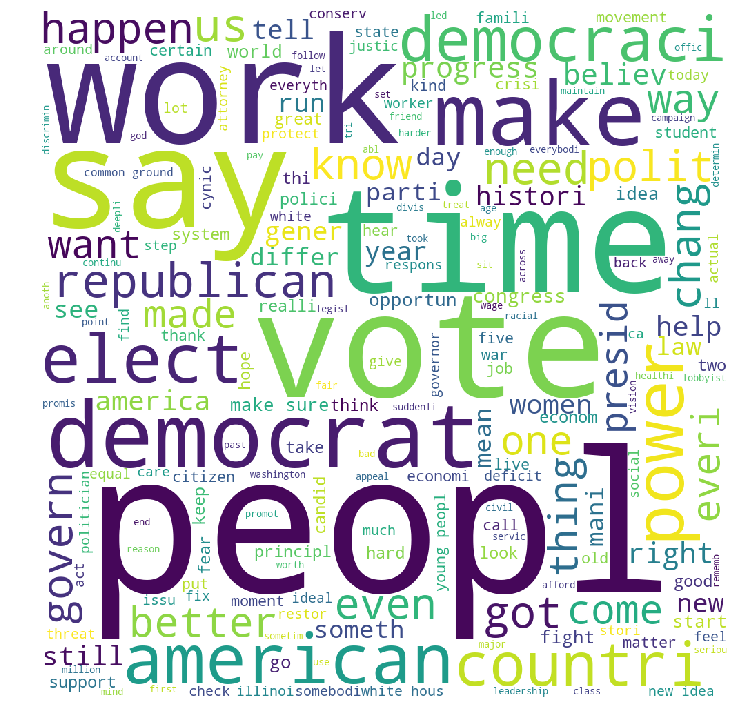

In [0]:

Stemmed_text = comment(token_list5)
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                min_font_size = 10).generate(Stemmed_text)
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

<FreqDist with 1334 samples and 3519 outcomes>
[('I', 93), ('peopl', 57), ('make', 30), ('time', 26), ('vote', 26), ('work', 26), ('say', 23), ('We', 23), ('democrat', 23), ('power', 22), ('get', 22), ('elect', 21), ('democraci', 21), ('countri', 20), ('american', 20), ('chang', 20), ('even', 19), ('republican', 19), ('us', 18), ('need', 17), ('got', 17), ('you', 17), ('that', 16), ('know', 16), ('polit', 16)]


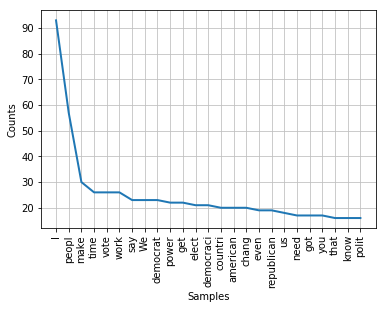

In [0]:
#Frequncy Distribution 
Freq_dist_nltk=nltk.FreqDist(token_list5)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

## ***Lemmatization*** - Converting words to its base form

In [0]:
#Use the wordnet library to map words to their lemmatized form
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
token_list6 = [lemmatizer.lemmatize(word) for word in token_list3 ]


# Lemmatization V/s Stemming

print("Token list after Lemmatization : ", token_list6[:20])
print("\nTotal tokens after Lemmatization : ", len(token_list6))
print("\nTotal tokens after Stemming : ", len(token_list4))
print("Token list after Stemming : ", token_list4[:20])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Token list after Lemmatization :  ['\ufeffWas', 'trying', 'explain', 'somebody', 'flying', "'s", 'corn', 'That', "'s", 'bean', 'And', 'impressed', 'agricultural', 'knowledge', 'Please', 'give', 'Amaury', 'outstanding', 'introduction', 'I']

Total tokens after Lemmatization :  3880

Total tokens after Stemming :  3880
Token list after Stemming :  ['\ufeffwa', 'tri', 'explain', 'somebodi', 'fli', "'s", 'corn', 'that', "'s", 'bean', 'and', 'impress', 'agricultur', 'knowledg', 'pleas', 'give', 'amauri', 'outstand', 'introduct', 'I']


In [0]:
print(stop_words)
stop_words_lst = ["'s", "n't", 'And', "'re", 'It', 'like', "'ve", "'m",'and']

token_list7 = [word for word in token_list6 if word not in stop_words_lst]
print(token_list7)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

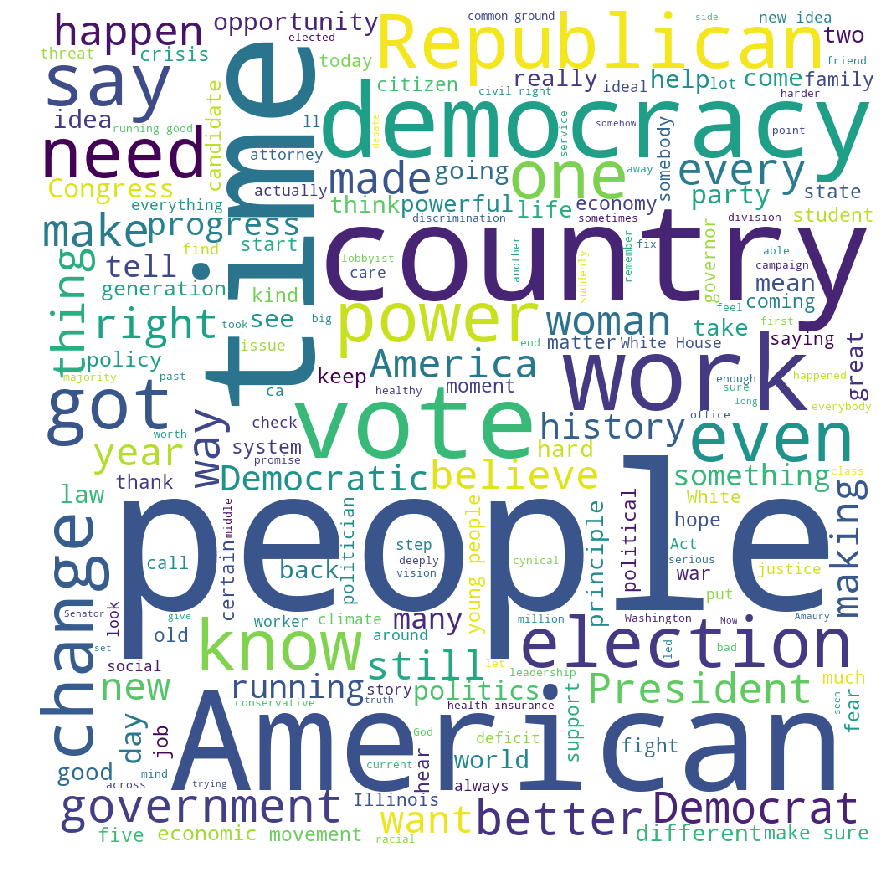

In [0]:
Lemmatized_text = comment(token_list7)
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                min_font_size = 10).generate(Lemmatized_text)
# plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

<FreqDist with 1550 samples and 3520 outcomes>
[('I', 93), ('people', 55), ('time', 26), ('We', 23), ('democracy', 21), ('work', 21), ('country', 20), ('make', 20), ('vote', 19), ('say', 18), ('u', 18), ('even', 18), ('got', 17), ('You', 17), ('get', 17), ('That', 16), ('know', 16), ('need', 16), ('But', 16), ('power', 16), ('change', 15), ('way', 14), ('election', 14), ('Americans', 14), ('thing', 14)]


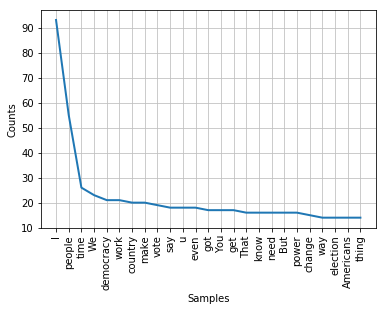

In [0]:
#Frequncy Distribution 
Freq_dist_nltk=nltk.FreqDist(token_list7)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

## ***Normalization*** - Converting to lowercase

In [0]:
token_list8=[word.lower() for word in token_list7 ]
print("Token list after converting to lower case : ", token_list8[:20])
print("\nTotal tokens after converting to lower case : ", len(token_list8))

Token list after converting to lower case :  ['\ufeffwas', 'trying', 'explain', 'somebody', 'flying', 'corn', 'that', 'bean', 'impressed', 'agricultural', 'knowledge', 'please', 'give', 'amaury', 'outstanding', 'introduction', 'i', 'bunch', 'good', 'friend']

Total tokens after converting to lower case :  3520


<FreqDist with 1499 samples and 3520 outcomes>
[('i', 93), ('people', 57), ('time', 26), ('we', 23), ('democracy', 21), ('vote', 21), ('work', 21), ('country', 20), ('u', 20), ('make', 20), ('even', 19), ('say', 18), ('got', 17), ('you', 17), ('get', 17), ('that', 16), ('know', 16), ('need', 16), ('but', 16), ('election', 16), ('change', 16), ('power', 16), ('better', 15), ('way', 14), ('americans', 14)]


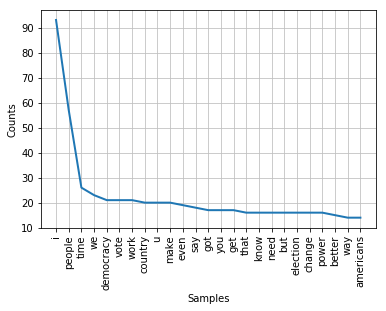

In [0]:
Freq_dist_nltk=nltk.FreqDist(token_list8)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

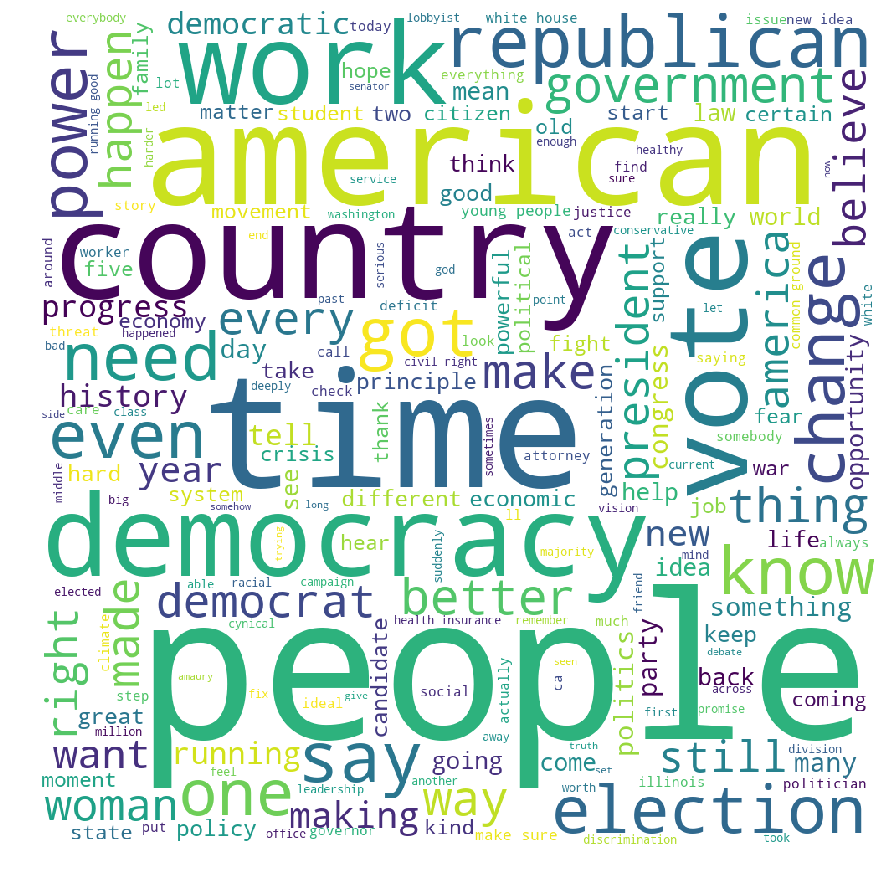

In [0]:
Normalized_text = comment(token_list8)

wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                min_font_size = 10).generate(Normalized_text)


# plotting the WordCloud image                        

plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 